Mario Amador Hurtado 1637543

Albert Garcia Uría 1637521

# **Hash functions**

Imports

In [20]:
import hashlib
from typing import Optional, Tuple

## Exercici 1

In [21]:
def uab_md5(message: str, num_bits: int) -> Optional[int]:
    try:
        h = hashlib.md5(message.encode()).hexdigest()
        hash_int = int(h, 16)
        hash_bin = format(hash_int, "0128b")
        if num_bits > 128 or num_bits <= 0:
            raise ValueError()
        return int(hash_bin[:num_bits], 2)
    except:
        return None

print(uab_md5("hola", 1))

0


## Exercici 2

In [22]:
import random
import string

def second_preimage(message: str, num_bits: int):
    collision = False
    i = 0
    ref = uab_md5(message, num_bits)

    while not collision:
        pi = ''.join(random.choices(string.ascii_letters + string.digits, k=5))
        pi_hash = uab_md5(pi, num_bits)

        if pi != message:
            collision = pi_hash == ref
            
        i += 1
    return pi, i-1
print(second_preimage("hola", 20)) 

('EQB5J', 2468103)


## Exercici 3

In [23]:
def collision(num_bits: int) -> Optional[Tuple[str, str, int]]:
    hashes = {}
    i=0
    while True:
        pi = ''.join(random.choices(string.ascii_letters + string.digits, k=5))
        h = uab_md5(pi, num_bits)

        if h in hashes.keys():
            if pi not in hashes.values():
                return pi, hashes[h], i
        
        hashes[h] = pi
        i += 1
    return

print(collision(20)) 

('Dv8jj', 'Sk0mp', 398)


## Exercici 4

### Part A

In [27]:
import time
preimage_iter = []
collision_iter = []

preimage_time = []
collision_time = []

for i in range(1, 25):
    print(i)
    start = time.perf_counter()
    _, iter = second_preimage("hola", i)
    end = time.perf_counter()
    preimage_iter.append(iter)
    preimage_time.append(end-start)

    start = time.perf_counter()
    _, _, iter =collision(i)
    end = time.perf_counter()
    collision_iter.append(iter)
    collision_time.append(end-start)

print(preimage_iter)
print(preimage_time)

print(collision_iter)
print(collision_time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[0, 1, 1, 26, 33, 25, 67, 51, 168, 1778, 1367, 5121, 6954, 32323, 37522, 10341, 73526, 259280, 423575, 118762, 6214090, 598578, 13922468, 6180216]
[5.104199999550474e-05, 1.749999989897333e-05, 1.4458000009653915e-05, 0.00013770800001111638, 0.00016924999999901047, 0.00013000000001284207, 0.0003298750000340078, 0.00025491600001714687, 0.0008227919998944344, 0.008567083999992064, 0.006171666999989611, 0.01893604199995025, 0.02255354199996873, 0.09811541699991722, 0.11240295900006458, 0.030887667000001784, 0.2218644580000273, 0.7852669999999762, 1.272006250000004, 0.3589475420000099, 18.512879999999996, 1.7700138330000073, 41.261861332999956, 18.614466125000035]
[2, 2, 2, 2, 1, 15, 4, 18, 23, 22, 98, 43, 79, 178, 403, 476, 450, 516, 289, 950, 1998, 1126, 6260, 3753]
[2.7666000050885486e-05, 1.9082999983766058e-05, 1.6499999901498086e-05, 1.6290999951706908e-05, 1.112500001454464e-05, 8.29580000072383e-05, 2.6000000048043148e-

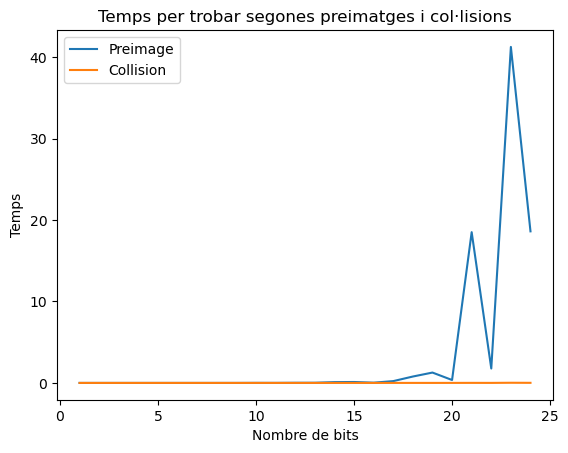

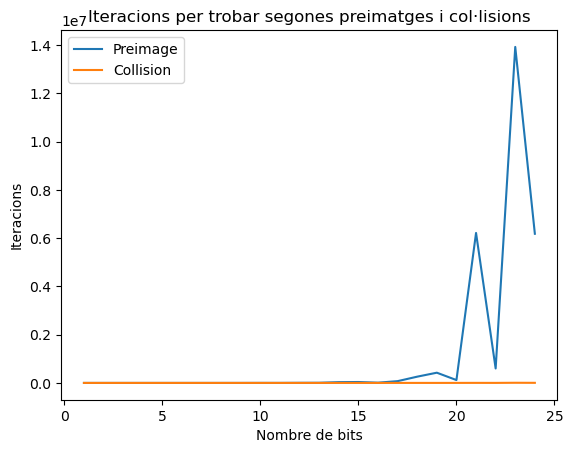

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(1, 25), preimage_time, label = "Preimage")
plt.plot(range(1, 25), collision_time, label = "Collision")
plt.xlabel('Nombre de bits')
plt.ylabel('Temps')
plt.title('Temps per trobar segones preimatges i col·lisions')
plt.legend()
plt.show()

plt.plot(range(1, 25), preimage_iter, label = "Preimage")
plt.plot(range(1, 25), collision_iter, label = "Collision")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar segones preimatges i col·lisions')
plt.legend()
plt.show()

In [39]:
from tabulate import tabulate

taula = list(zip(preimage_time, collision_time))
print("ITERACIONS")
print(tabulate(taula, headers=['Segona preimatge', 'Col·lisions'], tablefmt='grid'))

ITERACIONS
+--------------------+---------------+
|   Segona preimatge |   Col·lisions |
+====================+===============+
|        5.1042e-05  |   2.7666e-05  |
+--------------------+---------------+
|        1.75e-05    |   1.9083e-05  |
+--------------------+---------------+
|        1.4458e-05  |   1.65e-05    |
+--------------------+---------------+
|        0.000137708 |   1.6291e-05  |
+--------------------+---------------+
|        0.00016925  |   1.1125e-05  |
+--------------------+---------------+
|        0.00013     |   8.2958e-05  |
+--------------------+---------------+
|        0.000329875 |   2.6e-05     |
+--------------------+---------------+
|        0.000254916 |   9.6875e-05  |
+--------------------+---------------+
|        0.000822792 |   0.00012675  |
+--------------------+---------------+
|        0.00856708  |   0.000112917 |
+--------------------+---------------+
|        0.00617167  |   0.000470917 |
+--------------------+---------------+
|        0.018

In [40]:
print("TEMPS")
taula = list(zip(preimage_iter, collision_iter))
print(tabulate(taula, headers=['Segona preimatge', 'Col·lisions'], tablefmt='grid'))

TEMPS
+--------------------+---------------+
|   Segona preimatge |   Col·lisions |
+====================+===============+
|                  0 |             2 |
+--------------------+---------------+
|                  1 |             2 |
+--------------------+---------------+
|                  1 |             2 |
+--------------------+---------------+
|                 26 |             2 |
+--------------------+---------------+
|                 33 |             1 |
+--------------------+---------------+
|                 25 |            15 |
+--------------------+---------------+
|                 67 |             4 |
+--------------------+---------------+
|                 51 |            18 |
+--------------------+---------------+
|                168 |            23 |
+--------------------+---------------+
|               1778 |            22 |
+--------------------+---------------+
|               1367 |            98 |
+--------------------+---------------+
|               512

### Part B

In [42]:
import math

def n_teoric_preimage(num_bits : int) -> float:
    return 2**num_bits / 2

def n_teoric_collision(num_bits : int) -> float:
    return math.sqrt(math.log(2)) * 2**((num_bits+1)/2)

preimage_teoric_iter = []
collision_teoric_iter = []

for i in range (1,25):
    preimage_teoric_iter.append(n_teoric_preimage(i))
    collision_teoric_iter.append(n_teoric_collision(i))
    

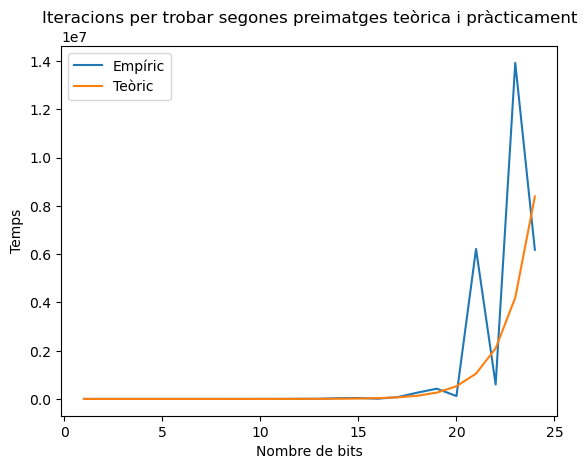

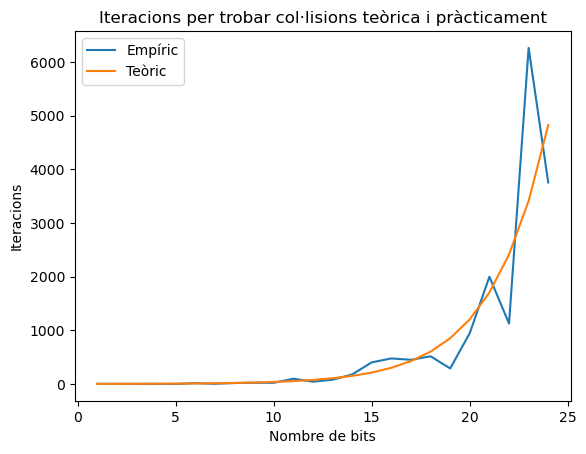

In [47]:
plt.plot(range(1, 25), preimage_iter, label = "Empíric")
plt.plot(range(1, 25), preimage_teoric_iter, label = "Teòric")
plt.xlabel('Nombre de bits')
plt.ylabel('Temps')
plt.title('Iteracions per trobar segones preimatges teòrica i pràcticament')
plt.legend()
plt.show()

plt.plot(range(1, 25), collision_iter, label = "Empíric")
plt.plot(range(1, 25), collision_teoric_iter, label = "Teòric")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar col·lisions teòrica i pràcticament')
plt.legend()
plt.show()

## Proves

In [ ]:
import unittest
class TestLab1(unittest.TestCase):
    
    def test_uab_md5(self):
        test_vectors_ok = (
        ["hola", 100, 381757249806289069081790873225],
        ["hola", 1, 0],
        ["dfk3874", 68, 229291433845740375560],
        ["dfk3874", 64, 14330714615358773472],
        ["Alexandria", 128, 221630910082124901698625759824682079437],
        ["Alexandria", 129, None],
        ["Alexandria", 0, None])
        for t in test_vectors_ok:
            my_value = uab_md5(t[0], t[1])
            print(my_value, t[2])
            self.assertEqual(my_value, t[2])

    def test_second_preimage(self):
        msg = "find a second preimage"
        for n in range(1, 15):
            new_msg, _ = second_preimage(msg, n)
            self.assertEqual(uab_md5(new_msg, n), uab_md5(msg, n))
            self.assertNotEqual(new_msg, msg)

    def test_collision(self):
        for n in range(1, 15):
            msg1, msg2, _ = collision(n)
            self.assertEqual(uab_md5(msg1, n), uab_md5(msg2, n))
            self.assertNotEqual(msg1, msg2)
unittest.main(argv=[''], verbosity=2, exit=False, buffer=True)

test_collision (__main__.TestLab1) ... ok
test_second_preimage (__main__.TestLab1) ... ok
test_uab_md5 (__main__.TestLab1) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.057s

OK
